In [2]:
# Install TensorFlow if not already installed
!pip install tensorflow

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [3]:
# Load dataset
df = pd.read_csv("../backend/brca.csv")


# Convert diagnosis
df['y'] = df['y'].map({'M': 1, 'B': 0})

df = df.drop(columns=["Unnamed: 0"])
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


In [4]:
# Define features and target variable
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Build Neural Network Model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4862 - loss: 0.7952 - val_accuracy: 0.9211 - val_loss: 0.3980
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8795 - loss: 0.3746 - val_accuracy: 0.9298 - val_loss: 0.2478
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9151 - loss: 0.2872 - val_accuracy: 0.9561 - val_loss: 0.1815
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9470 - loss: 0.2008 - val_accuracy: 0.9561 - val_loss: 0.1454
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9370 - loss: 0.1795 - val_accuracy: 0.9649 - val_loss: 0.1219
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9453 - loss: 0.1338 - val_accuracy: 0.9737 - val_loss: 0.1090
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9606 - loss: 0.1243 - val_accuracy: 0.9737 - val_loss: 0.0973
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9476 - loss: 0.1589 - val_accuracy: 0.9912 - val_loss

In [95]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Neural Network Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9850 - loss: 0.0904
Neural Network Accuracy: 0.9912
Neural Network Loss: 0.0670


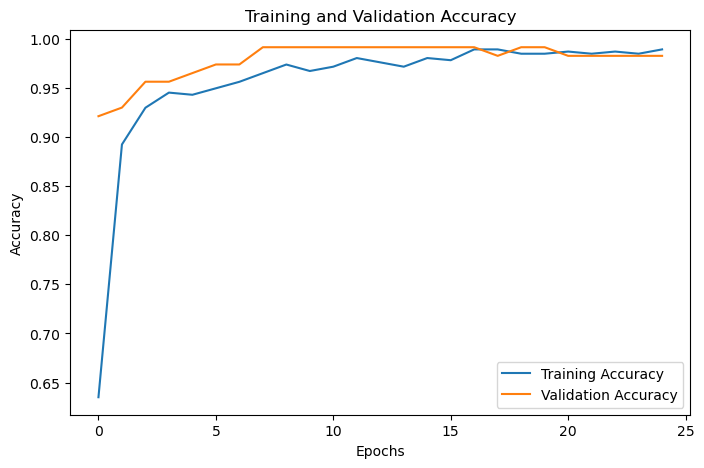

In [96]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

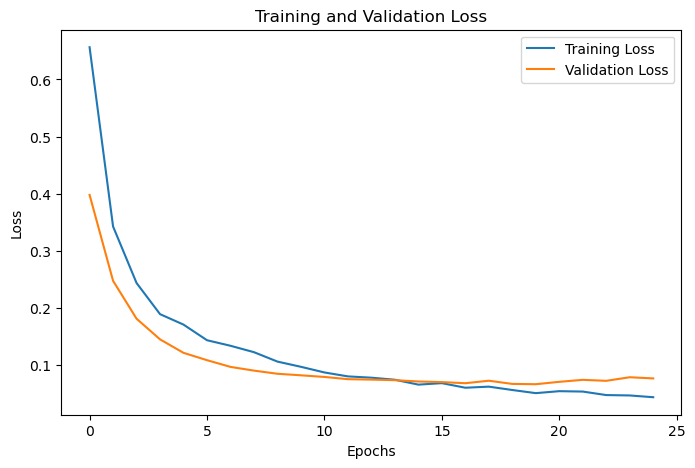

In [97]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [8]:
# Ablation experiment 1: Omit normalization of data
no_norm_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])


In [9]:
# Compile the model
no_norm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_norm_history = no_norm_model.fit(X_train, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3982 - loss: 32.3533 - val_accuracy: 0.4912 - val_loss: 1.3259
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5013 - loss: 3.9216 - val_accuracy: 0.6667 - val_loss: 0.6976
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5598 - loss: 1.1715 - val_accuracy: 0.7807 - val_loss: 0.6000
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7230 - loss: 0.6365 - val_accuracy: 0.7895 - val_loss: 0.5820
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.5660 - val_accuracy: 0.7281 - val_loss: 0.5661
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7330 - loss: 0.5772 - val_accuracy: 0.8509 - val_loss: 0.5595
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.5751 - val_accuracy: 0.8684 - val_loss: 0.5536
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7980 - loss: 0.5607 - val_accuracy: 0.8596 - val_los

In [10]:
# Evaluate the model
loss, accuracy = no_norm_model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Neural Network Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9028 - loss: 0.3454
Neural Network Accuracy: 0.9211
Neural Network Loss: 0.3418


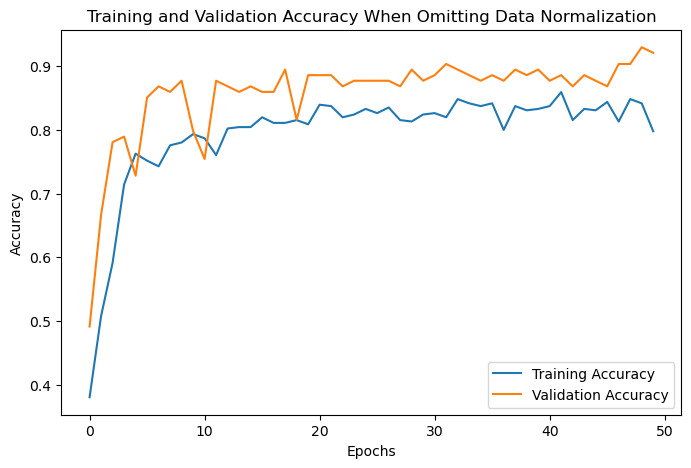

In [11]:
# Plot Training and Validation Accuracy for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_norm_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_norm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Omitting Data Normalization")
plt.show()

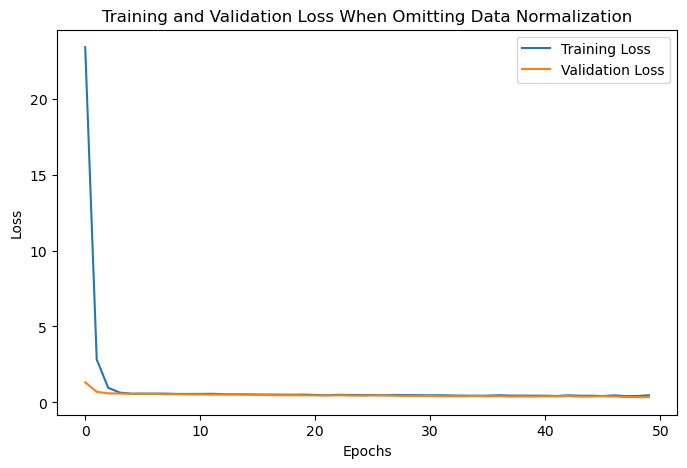

In [12]:
# Plot Training and Validation Loss for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_norm_history.history['loss'], label='Training Loss')
plt.plot(no_norm_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Omitting Data Normalization")
plt.show()

In [115]:
# ablation experiment 2: Omit 2nd hidden layer
no_2nd_hidden_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

In [116]:
# Compile the model
no_2nd_hidden_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_2nd_hidden_history = no_2nd_hidden_model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)



# Evaluate the model
loss, accuracy = no_2nd_hidden_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4921 - loss: 1.0023 - val_accuracy: 0.6316 - val_loss: 75.0511
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8238 - loss: 0.4479 - val_accuracy: 0.3684 - val_loss: 9.6429
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9129 - loss: 0.2870 - val_accuracy: 0.3684 - val_loss: 51.3302
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9391 - loss: 0.2411 - val_accuracy: 0.3684 - val_loss: 84.9957
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9430 - loss: 0.1855 - val_accuracy: 0.3684 - val_loss: 115.9921
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9341 - loss: 0.1768 - val_accuracy: 0.3684 - val_loss: 140.4344
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.1587 - val_accuracy: 0.3684 - val_loss: 164.6856
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
4/4 ━━━━━━━━━━━━━━━━━━━━ 

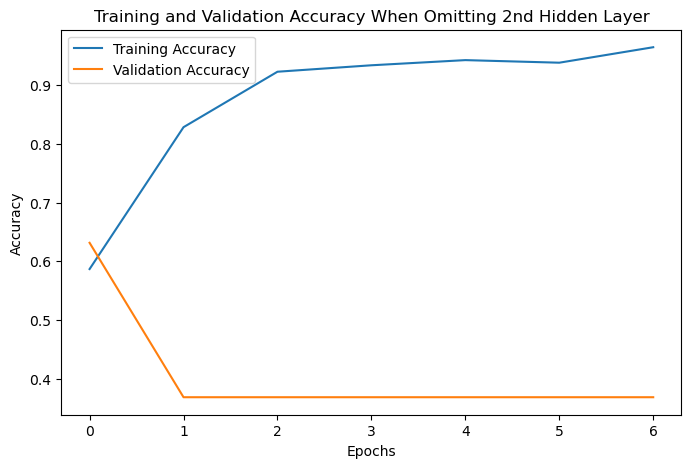

In [117]:
# Plot Training and Validation Accuracy for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_2nd_hidden_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_2nd_hidden_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Omitting 2nd Hidden Layer")
plt.show()

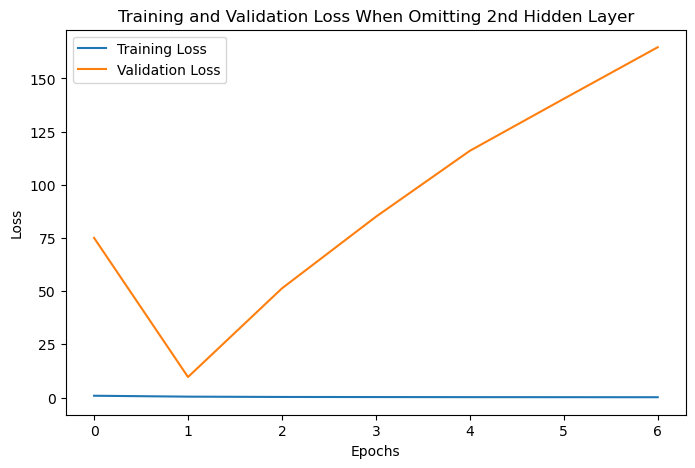

In [118]:
# Plot Training and Validation Loss for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_2nd_hidden_history.history['loss'], label='Training Loss')
plt.plot(no_2nd_hidden_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Omitting 2nd Hidden Layer")
plt.show()

In [127]:
no_dropout_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [128]:
# Compile the model
no_dropout_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_dropout_history = no_dropout_model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)



# Evaluate the model
loss, accuracy = no_dropout_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8423 - loss: 0.5305 - val_accuracy: 0.3684 - val_loss: 68.0277
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9362 - loss: 0.3081 - val_accuracy: 0.3684 - val_loss: 124.3144
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9526 - loss: 0.1807 - val_accuracy: 0.3684 - val_loss: 186.6193
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.1465 - val_accuracy: 0.3684 - val_loss: 248.2798
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.0953 - val_accuracy: 0.3684 - val_loss: 296.3754
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0833 - val_accuracy: 0.3684 - val_loss: 350.9380
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9487 - loss: 0.3355


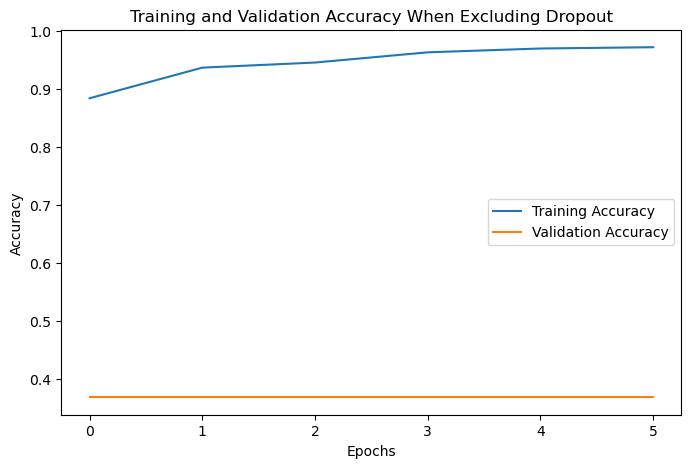

In [129]:
# Plot Training and Validation Accuracy for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_dropout_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_dropout_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding Dropout")
plt.show()

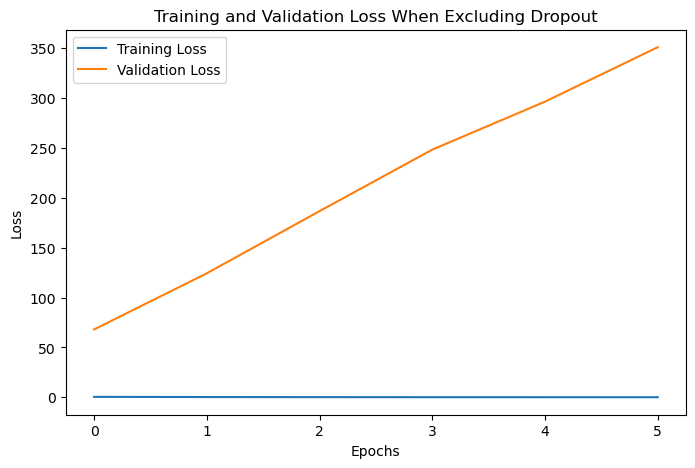

In [130]:
# Plot Training and Validation Loss for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_dropout_history.history['loss'], label='Training Loss')
plt.plot(no_dropout_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding Dropout")
plt.show()

In [134]:
no_1st_hidden_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [135]:
# Compile the model
no_1st_hidden_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_1st_history = no_1st_hidden_model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)



# Evaluate the model
loss, accuracy = no_1st_hidden_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7837 - loss: 0.4754 - val_accuracy: 0.6316 - val_loss: 136.7531
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8899 - loss: 0.3281 - val_accuracy: 0.6316 - val_loss: 98.7707
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9273 - loss: 0.2360 - val_accuracy: 0.6316 - val_loss: 75.3834
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9266 - loss: 0.1988 - val_accuracy: 0.6316 - val_loss: 55.8970
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9497 - loss: 0.1469 - val_accuracy: 0.6228 - val_loss: 40.1087
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.1294 - val_accuracy: 0.5614 - val_loss: 24.5221
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.1224 - val_accuracy: 0.3684 - val_loss: 13.4812
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9732 - loss: 0.1045 - val_accuracy: 0.2895 - 

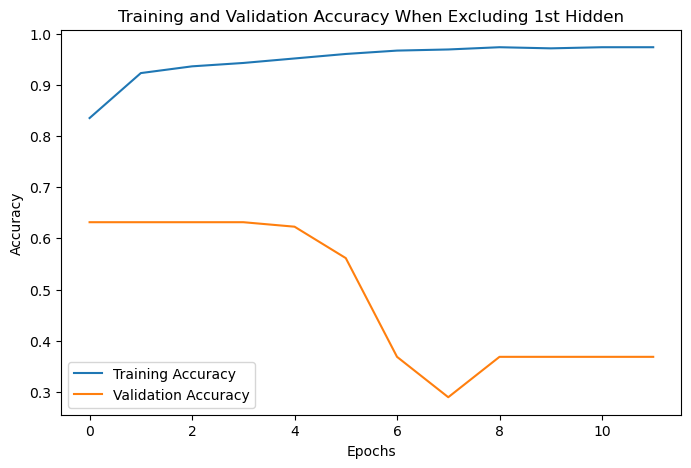

In [136]:
# Plot Training and Validation Accuracy for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_1st_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_1st_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding 1st Hidden")
plt.show()

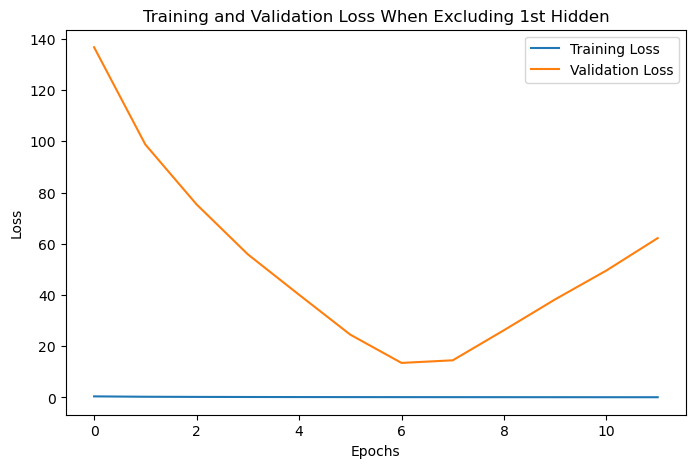

In [137]:
# Plot Training and Validation Loss for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_1st_history.history['loss'], label='Training Loss')
plt.plot(no_1st_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding 1st Hidden")
plt.show()

In [143]:
no_early_stop_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

In [144]:
# Compile the model
no_early_stop_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
no_early_stop_history = no_early_stop_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model
loss, accuracy = no_early_stop_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6815 - loss: 0.5977 - val_accuracy: 0.8596 - val_loss: 0.3909
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8752 - loss: 0.3489 - val_accuracy: 0.9298 - val_loss: 0.2437
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9167 - loss: 0.2431 - val_accuracy: 0.9474 - val_loss: 0.1711
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9663 - loss: 0.1591 - val_accuracy: 0.9474 - val_loss: 0.1343
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.1234 - val_accuracy: 0.9649 - val_loss: 0.1130
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9564 - loss: 0.1214 - val_accuracy: 0.9649 - val_loss: 0.1014
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9587 - loss: 0.1338 - val_accuracy: 0.9649 - val_loss: 0.0930
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9773 - loss: 0.0895 - val_accuracy: 0.9649 - val_loss

In [152]:
# Evaluate the model
loss, accuracy = no_early_stop_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy When Excluding Early Stopping: {accuracy:.4f}")
print(f"Loss When Excluding Early Stopping: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9703 - loss: 0.1411 
Neural Network Accuracy When Excluding Early Stopping: 0.9649
Loss When Excluding Early Stopping: 0.1091


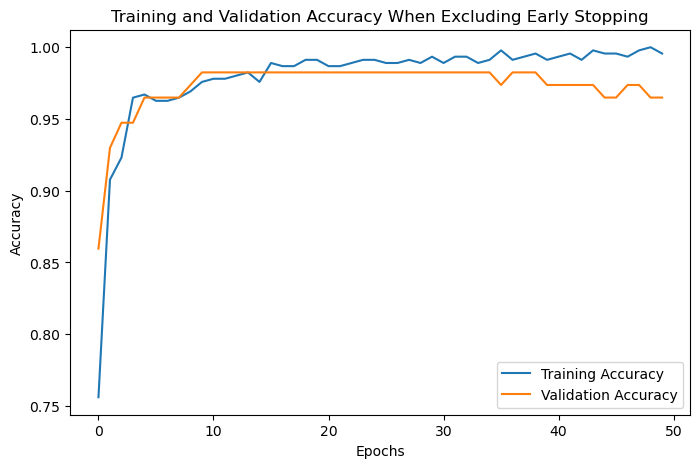

In [146]:
# Plot Training and Validation Accuracy for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_early_stop_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_early_stop_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding Early Stopping")
plt.show()

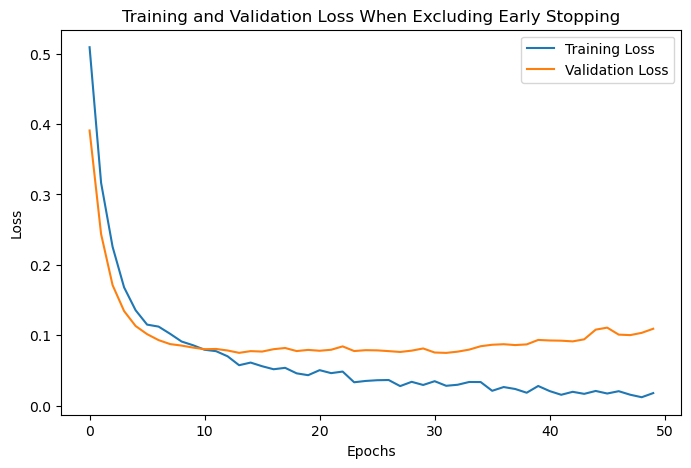

In [147]:
# Plot Training and Validation Loss for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_early_stop_history.history['loss'], label='Training Loss')
plt.plot(no_early_stop_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding Early Stopping")
plt.show()

In [154]:
no_hiddens_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(1, activation='sigmoid')  
])

In [155]:
# Compile the model
no_hiddens_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
no_hiddens_history = no_hiddens_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7034 - loss: 0.5462 - val_accuracy: 0.7456 - val_loss: 0.4993
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8396 - loss: 0.4498 - val_accuracy: 0.8421 - val_loss: 0.4082
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8529 - loss: 0.3582 - val_accuracy: 0.8772 - val_loss: 0.3493
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8968 - loss: 0.3161 - val_accuracy: 0.8860 - val_loss: 0.3064
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9011 - loss: 0.3074 - val_accuracy: 0.9386 - val_loss: 0.2731
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9204 - loss: 0.2536 - val_accuracy: 0.9474 - val_loss: 0.2491
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9230 - loss: 0.2349 - val_accuracy: 0.9474 - val_loss: 0.2296
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9326 - loss: 0.2254 - val_accuracy: 0.9561 - val_loss

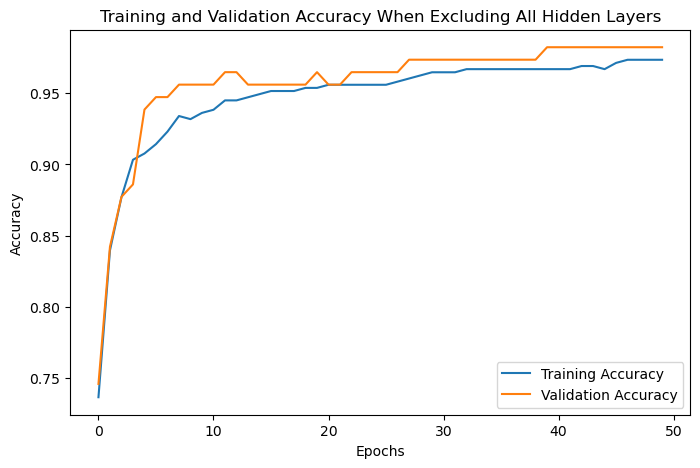

In [156]:
# Plot Training and Validation Accuracy for ablation experiment 4
plt.figure(figsize=(8, 5))
plt.plot(no_hiddens_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_hiddens_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding All Hidden Layers")
plt.show()

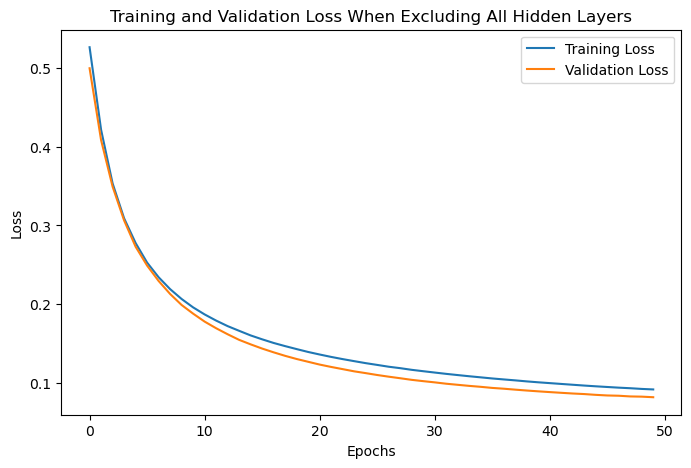

In [157]:
# Plot Training and Validation Loss for ablation experiment 4
plt.figure(figsize=(8, 5))
plt.plot(no_hiddens_history.history['loss'], label='Training Loss')
plt.plot(no_hiddens_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding All Hidden Layers")
plt.show()

In [158]:
loss, accuracy = no_hiddens_model.evaluate(X_test_scaled, y_test)

print(f"Neural Network Accuracy When Excluding All Hidden: {accuracy:.4f}")
print(f"Loss When Excluding All Hidden: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9815 - loss: 0.0923 
Neural Network Accuracy When Excluding All Hidden: 0.9825
Loss When Excluding All Hidden: 0.0822
